<h1>Project 6</h1>

<h2>Census Income Dataset</h2>

<img src="https://cdn.pixabay.com/photo/2016/03/29/08/48/project-1287781_1280.jpg">

***First importing necessary packages***

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

***Importing data which is in csv format***

In [2]:
df=pd.read_csv('Census_Income_Dataset.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


***Lets give names to our dataset so that our data will be meaningfull***

In [3]:
df.columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','Income']
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<h2>Start of EDA process</h2>

***Checking shape of the Dataset***

In [4]:
df.shape

(32561, 15)

***Checking data types and null count of the columns***

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  Income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


***Coverting missing values in form to ? to nan so that we can do further analysis***

In [6]:
df.replace({' ?': np.nan}, regex=False,inplace=True)
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
Income               0
dtype: int64

***Dropping missing values as they are high in number***

In [7]:
df.dropna(subset=["workclass"], axis=0, inplace=True)
df.dropna(subset=["occupation"], axis=0, inplace=True)
df.dropna(subset=["native-country"], axis=0, inplace=True)
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
Income            0
dtype: int64

In [8]:
df.shape

(30162, 15)

In [9]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
Income            object
dtype: object

***Separating our continuos data columns***

In [10]:
dfc=df[['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']]
dfc.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


***Separating our discrete data columns***

In [11]:
dfd=df[['workclass','education','marital-status','occupation','relationship','race','sex','native-country']]
dfd.head()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


***Lets check how all our categorical variable containing variables are distributed***

AxesSubplot(0.125,0.125;0.775x0.755)


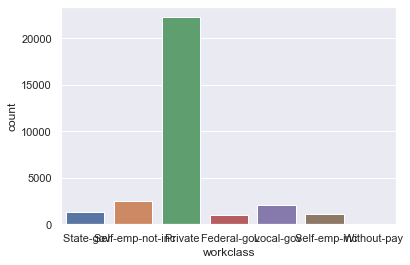

AxesSubplot(0.125,0.125;0.775x0.755)


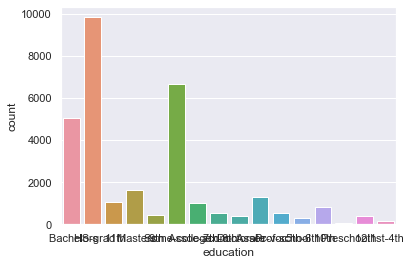

AxesSubplot(0.125,0.125;0.775x0.755)


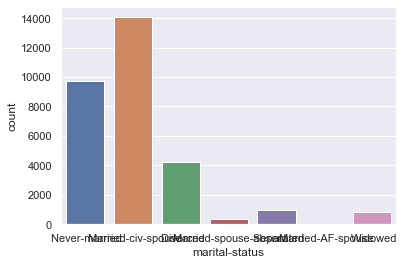

AxesSubplot(0.125,0.125;0.775x0.755)


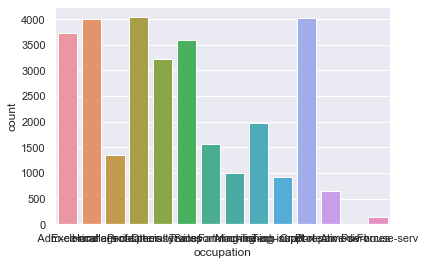

AxesSubplot(0.125,0.125;0.775x0.755)


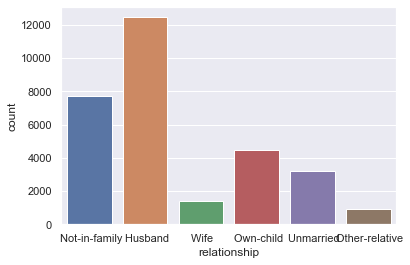

AxesSubplot(0.125,0.125;0.775x0.755)


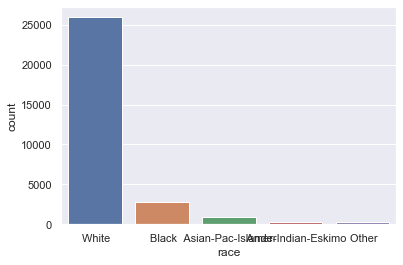

AxesSubplot(0.125,0.125;0.775x0.755)


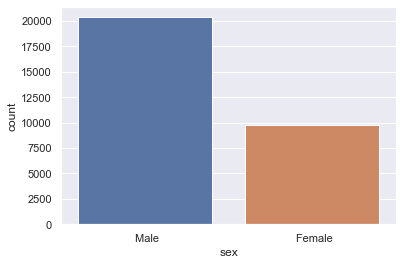

AxesSubplot(0.125,0.125;0.775x0.755)


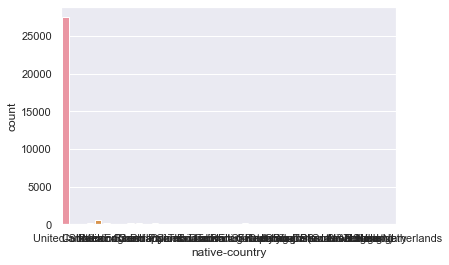

AxesSubplot(0.125,0.125;0.775x0.755)


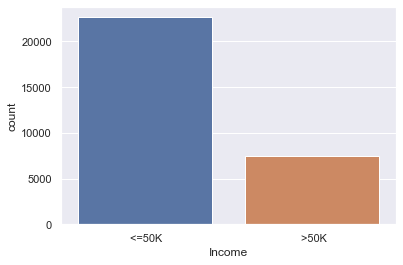

In [12]:
cold=['workclass','education','marital-status','occupation','relationship','race','sex','native-country','Income']
    
for i in range(0,9):
    print(sns.countplot(df[cold[i]]))
    plt.show()

***Lets visualize using histogram***

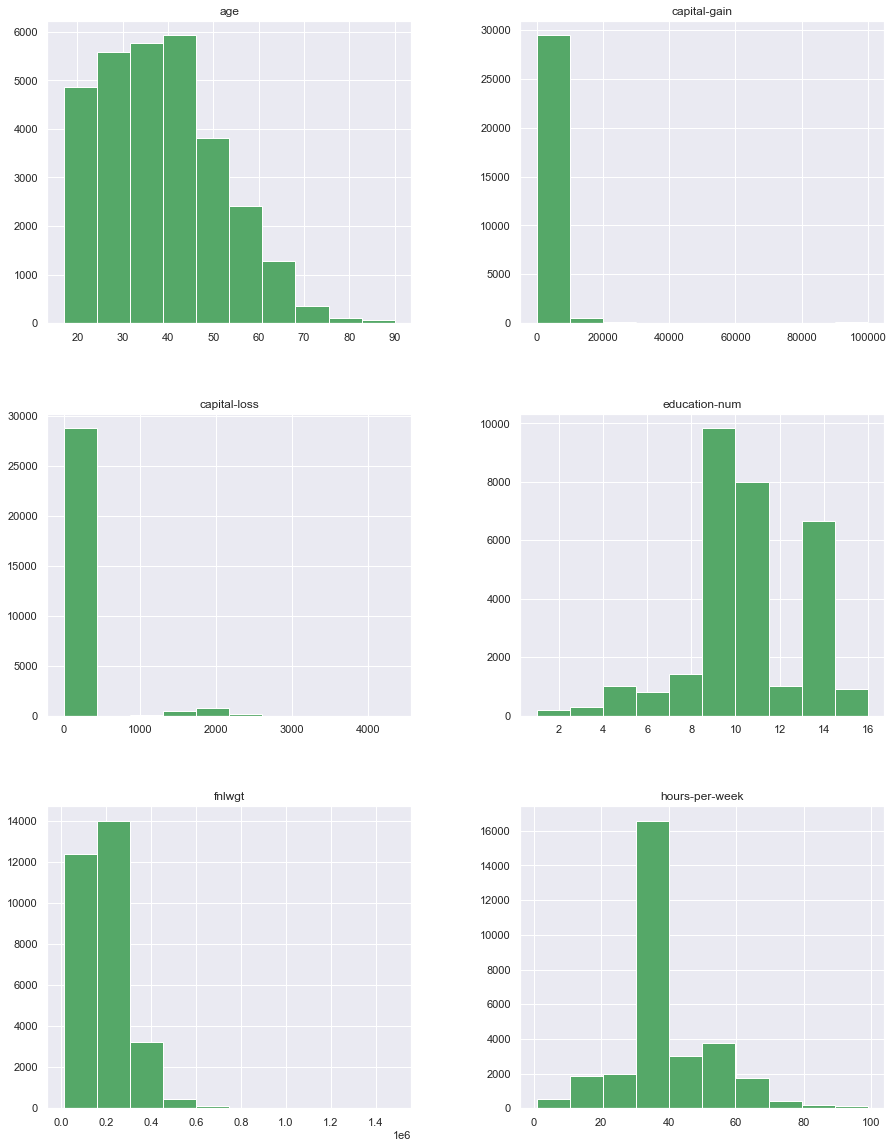

In [13]:
dfc.hist(figsize=(15,20),color='g')
plt.show()

***Lets visualize our continuous variables with our output variable***

AxesSubplot(0.125,0.125;0.775x0.755)


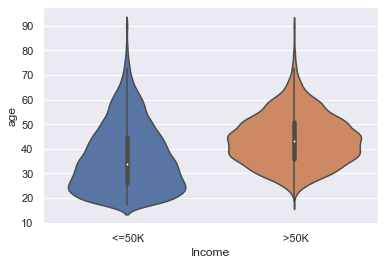

AxesSubplot(0.125,0.125;0.775x0.755)


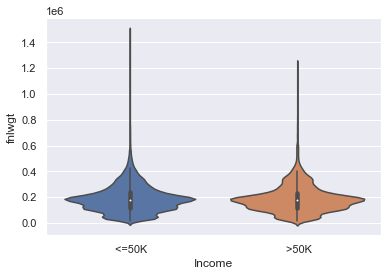

AxesSubplot(0.125,0.125;0.775x0.755)


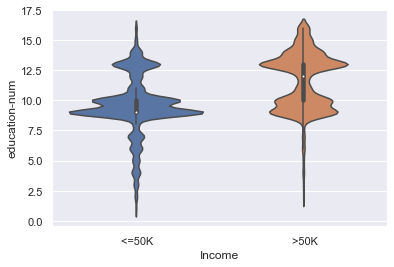

AxesSubplot(0.125,0.125;0.775x0.755)


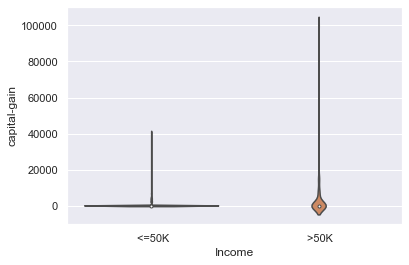

AxesSubplot(0.125,0.125;0.775x0.755)


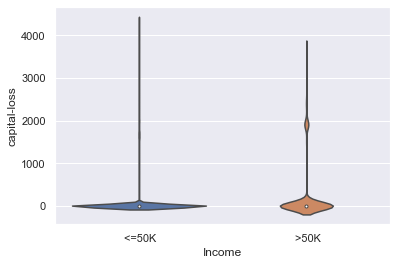

AxesSubplot(0.125,0.125;0.775x0.755)


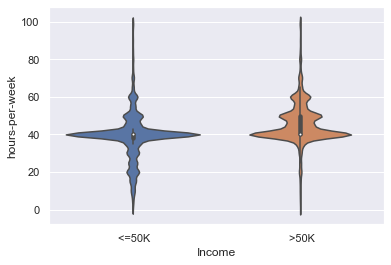

In [14]:
colc=['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']
     
for i in range(0,6):
    print(sns.violinplot(x="Income", y=df[colc[i]], data=df))
    plt.show()

***Lets convert all our categorical data to numerical***

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Income'])
y1=le.transform(df['Income'])

In [16]:
y=pd.DataFrame(y1,columns =["Income"])
y.head()

,Income
0,0
1,0
2,0
3,0
4,0


As our other columns has more than 2 types, lets use get dummies function

In [17]:
x1=pd.get_dummies(dfd)
x1.head()

,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,education_ 10th,education_ 11th,education_ 12th,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df_x=pd.concat([dfc,x1], axis=1)
df_x.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df_final=pd.concat([df_x,y],axis=1)

***Lets calculate correlation***

In [20]:
df_final.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,Income
age,1.000000,-0.076511,0.043526,0.080154,0.060165,0.101599,0.056626,0.068256,-0.210491,0.111039,...,0.007836,0.000024,0.001923,-0.007879,-0.004940,0.007868,0.016259,-0.017775,0.000657,-0.002884
fnlwgt,-0.076511,1.000000,-0.044992,0.000422,-0.009750,-0.022886,-0.006932,-0.003520,0.046589,-0.025496,...,0.007121,-0.003055,-0.010598,0.001615,-0.001241,-0.000413,-0.083390,-0.010761,0.005707,-0.000969
education-num,0.043526,-0.044992,1.000000,0.124416,0.079646,0.152522,0.058244,0.097378,-0.165069,0.078843,...,-0.042083,0.001815,0.017812,0.049129,0.008183,-0.017134,0.127207,-0.010953,-0.001661,-0.003649
capital-gain,0.080154,0.000422,0.124416,1.000000,-0.032229,0.080432,-0.006299,-0.009624,-0.048185,0.096482,...,-0.006270,-0.002816,-0.002582,0.007639,-0.003501,-0.003603,0.012375,-0.002493,-0.002317,0.002161
capital-loss,0.060165,-0.009750,0.079646,-0.032229,1.000000,0.052417,0.010380,0.014727,-0.036377,0.030956,...,-0.004560,-0.004175,0.005677,0.005679,-0.005191,0.008849,0.015119,0.000344,-0.005036,-0.001518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
native-country_ Trinadad&Tobago,0.007868,-0.000413,-0.017134,-0.003603,0.008849,-0.007566,-0.004390,-0.001255,0.002164,0.002630,...,-0.001472,-0.000467,-0.001187,-0.000913,-0.000580,1.000000,-0.078606,-0.001127,-0.000563,0.002526
native-country_ United-States,0.016259,-0.083390,0.127207,0.012375,0.015119,0.010673,0.017541,0.032937,-0.049809,0.007350,...,-0.193727,-0.061442,-0.156254,-0.120121,-0.076390,-0.078606,1.000000,-0.148334,-0.074108,0.001521
native-country_ Vietnam,-0.017775,-0.010761,-0.010953,-0.002493,0.000344,-0.010381,-0.000004,-0.003952,0.009369,-0.004973,...,-0.002777,-0.000881,-0.002240,-0.001722,-0.001095,-0.001127,-0.148334,1.000000,-0.001062,0.010736
native-country_ Yugoslavia,0.000657,0.005707,-0.001661,-0.002317,-0.005036,0.006983,-0.004139,-0.000550,0.003861,0.003343,...,-0.001387,-0.000440,-0.001119,-0.000860,-0.000547,-0.000563,-0.074108,-0.001062,1.000000,-0.001836


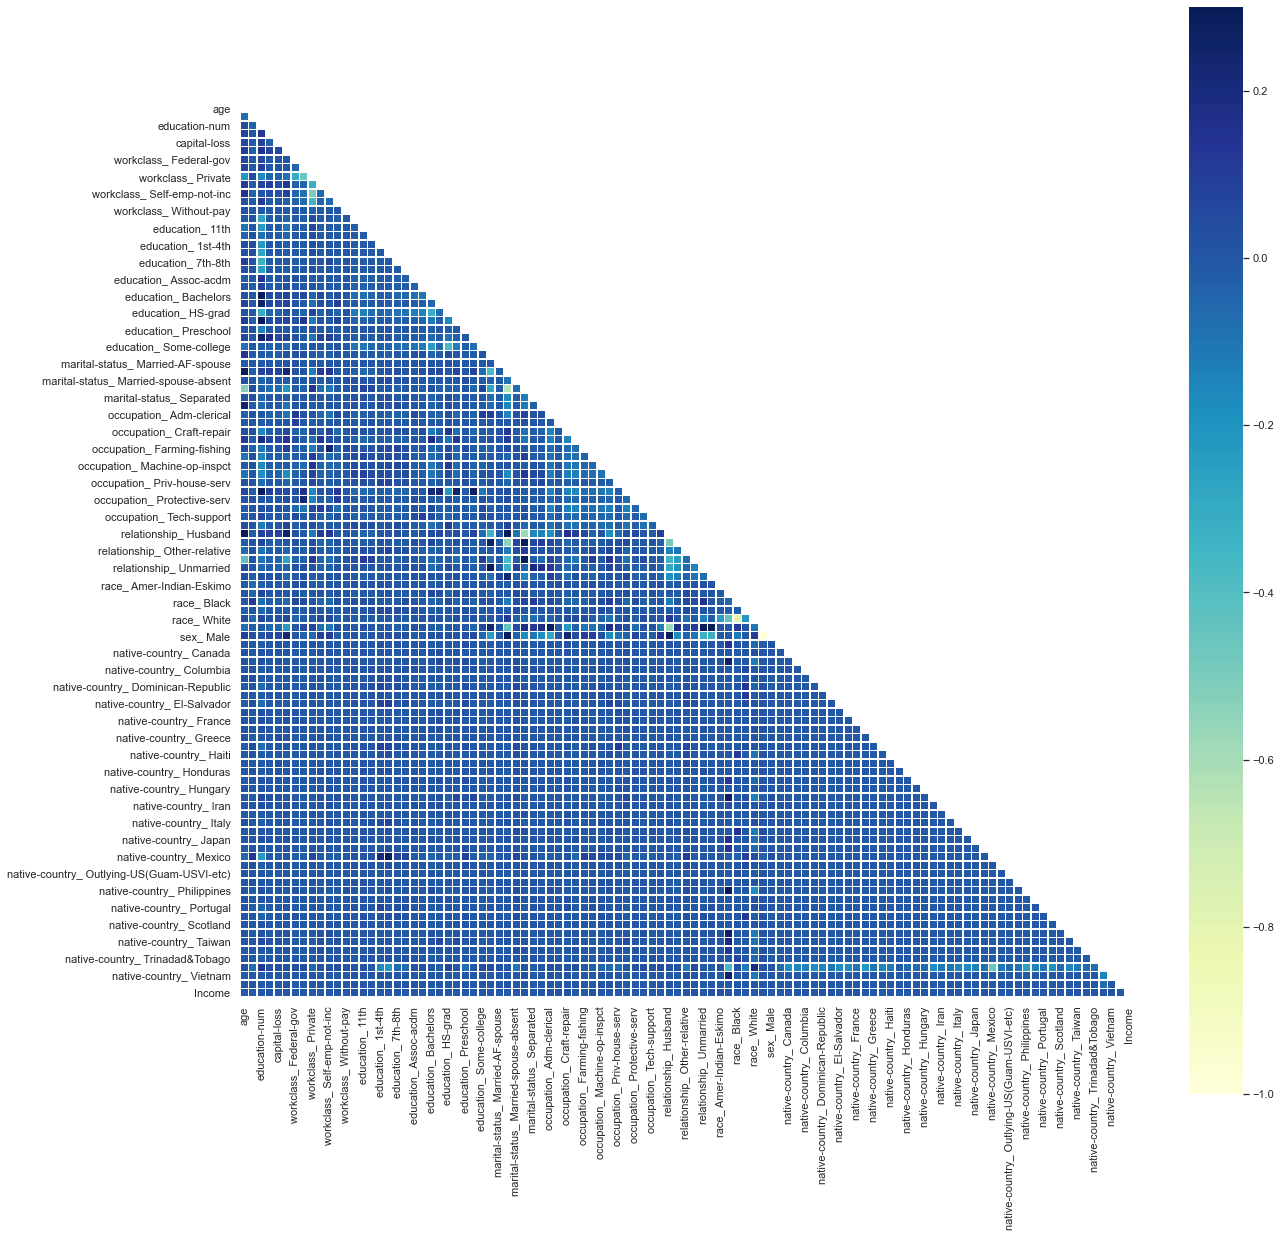

In [21]:
import numpy as np
corr = df_final.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(20, 20))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, linewidths=0.5,cmap="YlGnBu")

In [22]:
x=df_x
x.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
y.head()

,Income
0,0
1,0
2,0
3,0
4,0


<h2>End of EDA Process</h2>


Lets start Building models to make predictions and find the model that works best on our dataset

<h2>Start of Machine Learning Process</h2>

Since out target variable is Bivariant, we are going to do classification analysis

***Lets import required packages***

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

***Lets split our data randomly and see which model works better***

In [25]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

***Lets import all the classification models***

In [26]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GNB=GaussianNB()

In [27]:
models = []
models.append(('KNeighborsClassifier', KNN))
models.append(('SVC', SV))
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DT))
models.append(('GaussianNB', GNB))

***Lets create a loop that will execute all our models***

*-----------------------------* KNeighborsClassifier *------------------------------*


KNeighborsClassifier(n_neighbors=6)


Accuracy_score =  0.7800430963036632


Cross_Val_Score =  0.7850605081373543


roc_auc_score =  0.6036664010485384


classification_report
               precision    recall  f1-score   support

           0       0.79      0.96      0.87      4503
           1       0.68      0.25      0.36      1530

    accuracy                           0.78      6033
   macro avg       0.74      0.60      0.61      6033
weighted avg       0.76      0.78      0.74      6033



[[4330  173]
 [1154  376]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


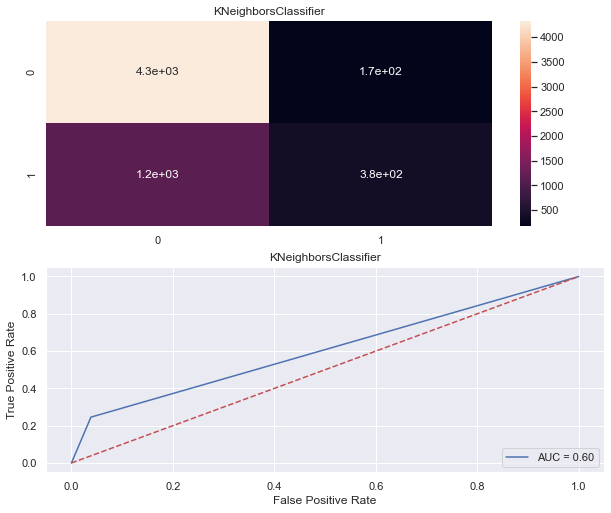




*-----------------------------* SVC *------------------------------*


SVC()


Accuracy_score =  0.7818664014586442


Cross_Val_Score =  0.7884423391233937


roc_auc_score =  0.570581921420578


classification_report
               precision    recall  f1-score   support

           0       0.77      1.00      0.87      4503
           1       0.99      0.14      0.25      1530

    accuracy                           0.78      6033
   macro avg       0.88      0.57      0.56      6033
weighted avg       0.83      0.78      0.71      6033



[[4500    3]
 [1313  217]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


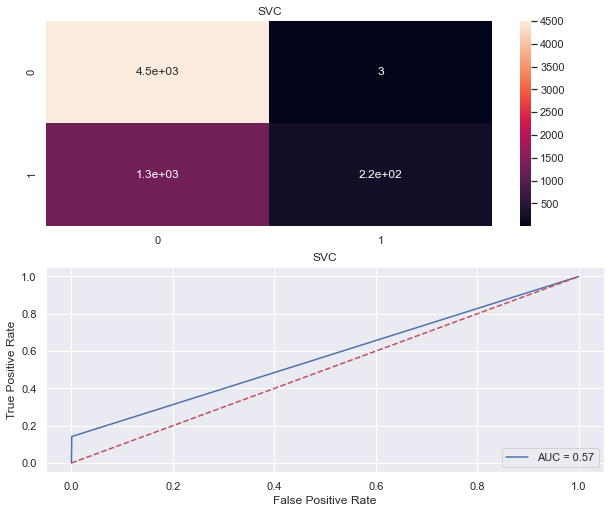




*-----------------------------* LogisticRegression *------------------------------*


LogisticRegression()


Accuracy_score =  0.7894911321067463


Cross_Val_Score =  0.7904979651119342


roc_auc_score =  0.6175471254457813


classification_report
               precision    recall  f1-score   support

           0       0.80      0.97      0.87      4503
           1       0.73      0.27      0.39      1530

    accuracy                           0.79      6033
   macro avg       0.76      0.62      0.63      6033
weighted avg       0.78      0.79      0.75      6033



[[4352  151]
 [1119  411]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


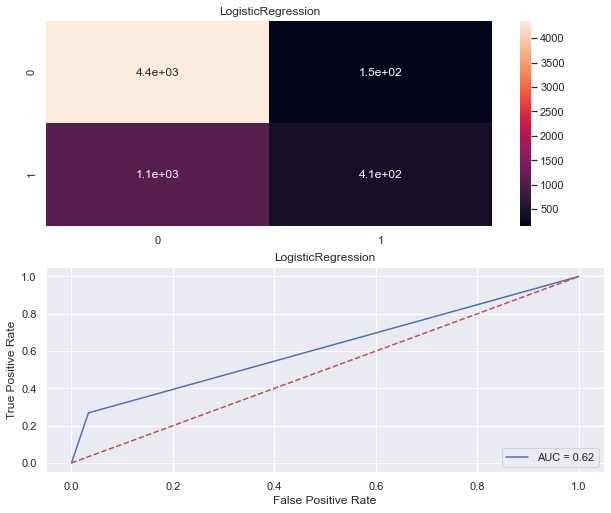




*-----------------------------* DecisionTreeClassifier *------------------------------*


DecisionTreeClassifier(random_state=6)


Accuracy_score =  0.8135256091496768


Cross_Val_Score =  0.8120156315801967


roc_auc_score =  0.7577096750314605


classification_report
               precision    recall  f1-score   support

           0       0.88      0.87      0.87      4503
           1       0.63      0.64      0.64      1530

    accuracy                           0.81      6033
   macro avg       0.75      0.76      0.76      6033
weighted avg       0.82      0.81      0.81      6033



[[3922  581]
 [ 544  986]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


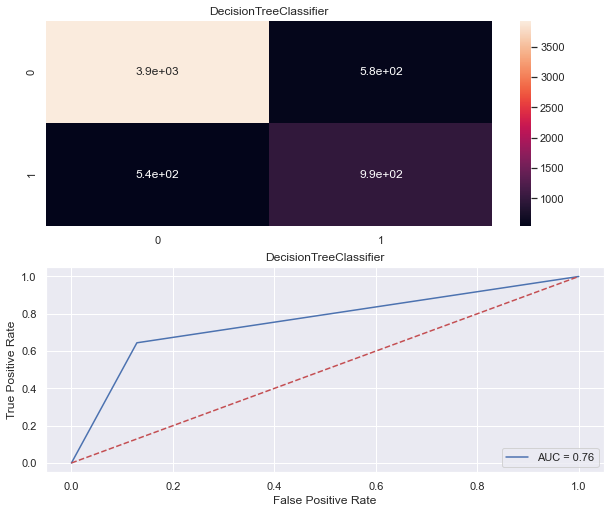




*-----------------------------* GaussianNB *------------------------------*


GaussianNB()


Accuracy_score =  0.791148682247638


Cross_Val_Score =  0.78857505303721


roc_auc_score =  0.6359183202483747


classification_report
               precision    recall  f1-score   support

           0       0.80      0.95      0.87      4503
           1       0.69      0.32      0.44      1530

    accuracy                           0.79      6033
   macro avg       0.75      0.64      0.65      6033
weighted avg       0.78      0.79      0.76      6033



[[4282  221]
 [1039  491]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


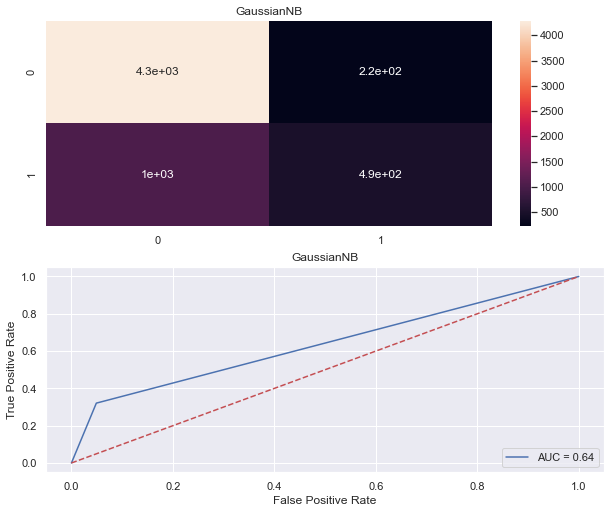

In [28]:
Model = []
score = []
cvs=[]
rocscore=[]
for name,model in models:
    print('*-----------------------------*',name,'*------------------------------*')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score = ',AS)
    score.append(AS*100)
    print('\n')
    sc = cross_val_score(model, x, y, cv=10, scoring='accuracy').mean()
    print('Cross_Val_Score = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pre)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print ('roc_auc_score = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate, true_positive_rate, label='AUC = %0.2f'% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    print('\n\n')

In [29]:
Final_R = pd.DataFrame({'Classification Model': Model, 'Accuracy Score': score ,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
Final_R

,Classification Model,Accuracy Score,Cross_val_score,Roc_auc_curve
0,KNeighborsClassifier,78.004310,78.506051,60.366640
1,SVC,78.186640,78.844234,57.058192
2,LogisticRegression,78.949113,79.049797,61.754713
3,DecisionTreeClassifier,81.352561,81.201563,75.770968
4,GaussianNB,79.114868,78.857505,63.591832


**DecisionTreeClassifier gave us highest accuracy, so we are going to choose that as our final model**

It Was not feasible to do more analysis on this dataset as data was huge and it was taking a long time to execute codes

<h2>End of Machine learning Process</h2>


<h1>Now lets save our final model</h1>

In [30]:
import joblib
joblib.dump(DT,'Census_Income_Dataset.pkl')

['Census_Income_Dataset.pkl']

<img src="https://knowledge.wharton.upenn.edu/wp-content/uploads/2020/05/Women-in-data-science.jpg">
